In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
ychopmdf = pd.read_excel(
    "data/ycharts_opm/ycharts_operating_margins_dropped.xlsx",
    index_col=0,
    parse_dates=True,
)
# Filter by April, because it's when I compose portfolios
ychopmdf.query("index.dt.month == 4", inplace=True)

ychopmdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2009-04-01 to 2022-04-01
Columns: 16383 entries, A.H.V to SEKYF
dtypes: float64(16383)
memory usage: 1.8 MB


In [4]:
ychopmdf.tail(3)


,A.H.V,A,AA,AAA.P.V,AAAJ.P.V,AAALF,AAALY,AAB.TO,AABB,AAC.P.V,...,SEHKF,SEHLF,SEI.V,SEIBF,SEIC,SEIGF,SEIGY,SEKEF,SEKEY,SEKYF
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,NaN,15.13,3.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.11,NaN,3.91,27.03,6.27,6.27,3.86,3.86,7.66
2021-04-01,NaN,19.68,10.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.16,NaN,-7.54,28.01,30.12,30.12,6.38,6.38,9.30
2022-04-01,NaN,22.48,20.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.86,NaN,2.66,30.01,-31.51,-31.51,8.88,8.88,4.45


In [5]:
# columns which contain less then `thresh` missing values are removed
ychopmdf.dropna(axis=1, thresh=12).shape[1]


4842

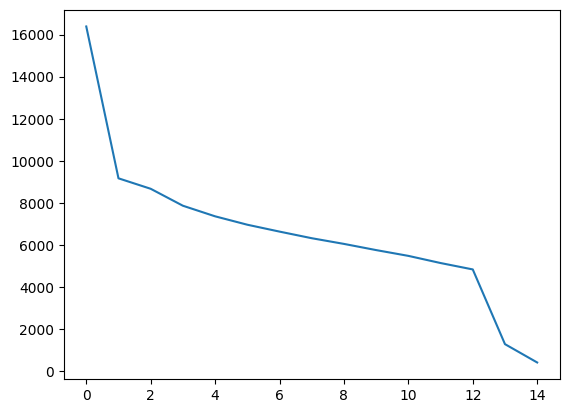

In [6]:
remains = [ychopmdf.dropna(axis=1, thresh=i).shape[1] for i in range(15)]
plt.plot(remains)


Thus, we'll drop all companies, that have more then 2 NaNs.


In [7]:
ychopmdf.dropna(axis=1, thresh=12, inplace=True)

In [8]:
ychopmdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2009-04-01 to 2022-04-01
Columns: 4842 entries, A to SEKEY
dtypes: float64(4842)
memory usage: 529.7 KB


<Axes: ylabel='date'>

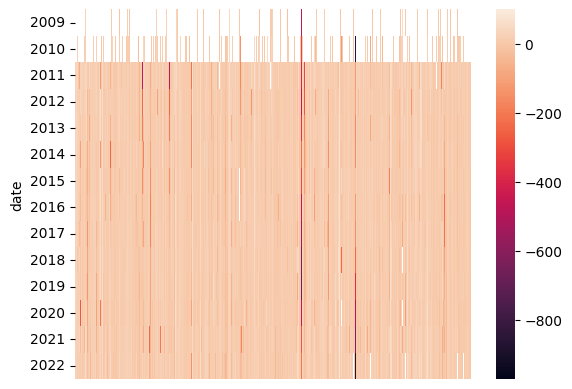

In [9]:
import seaborn as sns

sns.heatmap(ychopmdf, xticklabels=False, yticklabels=ychopmdf.index.year)  # type: ignore

In [10]:
ychopmdf.loc["2009":"2010"].notna().sum(1)  # number of notnas

date
2009-04-01     493
2010-04-01    1397
dtype: int64

Year 2009 has data for only 493 out of 4842, so it will be dropped.

```py
ychopmdf.drop("2009-04-01", inplace=True)
```


In [11]:
outl_mask = ychopmdf.drop("2009-04-01").mean().sort_values() < 0.1
outl_mask.sum()

663

553 outliers, dropping them too

In [12]:
ychopmdf = ychopmdf.loc[:, ~outl_mask]

<Axes: >

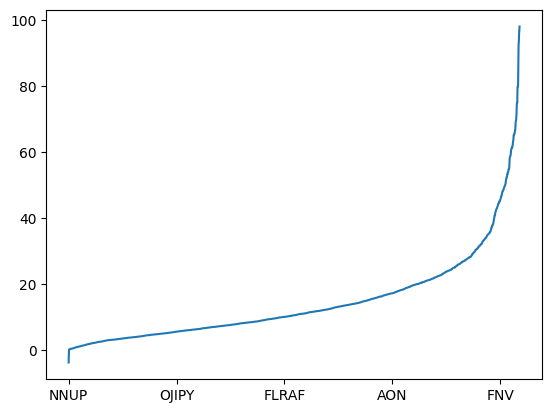

In [13]:
ychopmdf.mean().sort_values().plot()

Saving filtered df and ticker list to files for further use:

In [14]:
from json import dump

with open("data/ych_filtered_tickers.json", "w") as f:
    dump(ychopmdf.columns.to_list(), f)

In [15]:
ychopmdf.to_csv("data/ycharts_opm/ycharts_opm_filtered_for_use.csv")